In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df = pd.read_csv('../datasets/alldata_1_for_kaggle.csv', encoding='latin-1')
df.head(3)

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...


In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.rename({'0': 'target', 'a': 'feature'}, axis = 1)
df.head(3)

,target,feature
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...


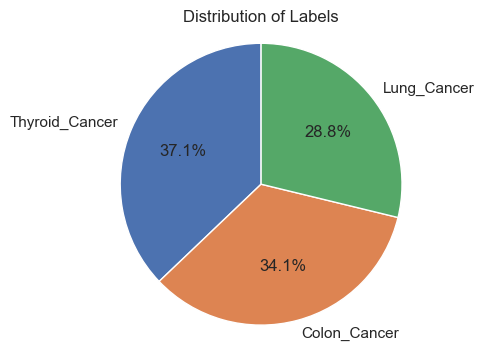

In [4]:
# Count the occurrences of each label
label_counts = df['target'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.savefig('label_distribution.png', bbox_inches='tight')
plt.show()

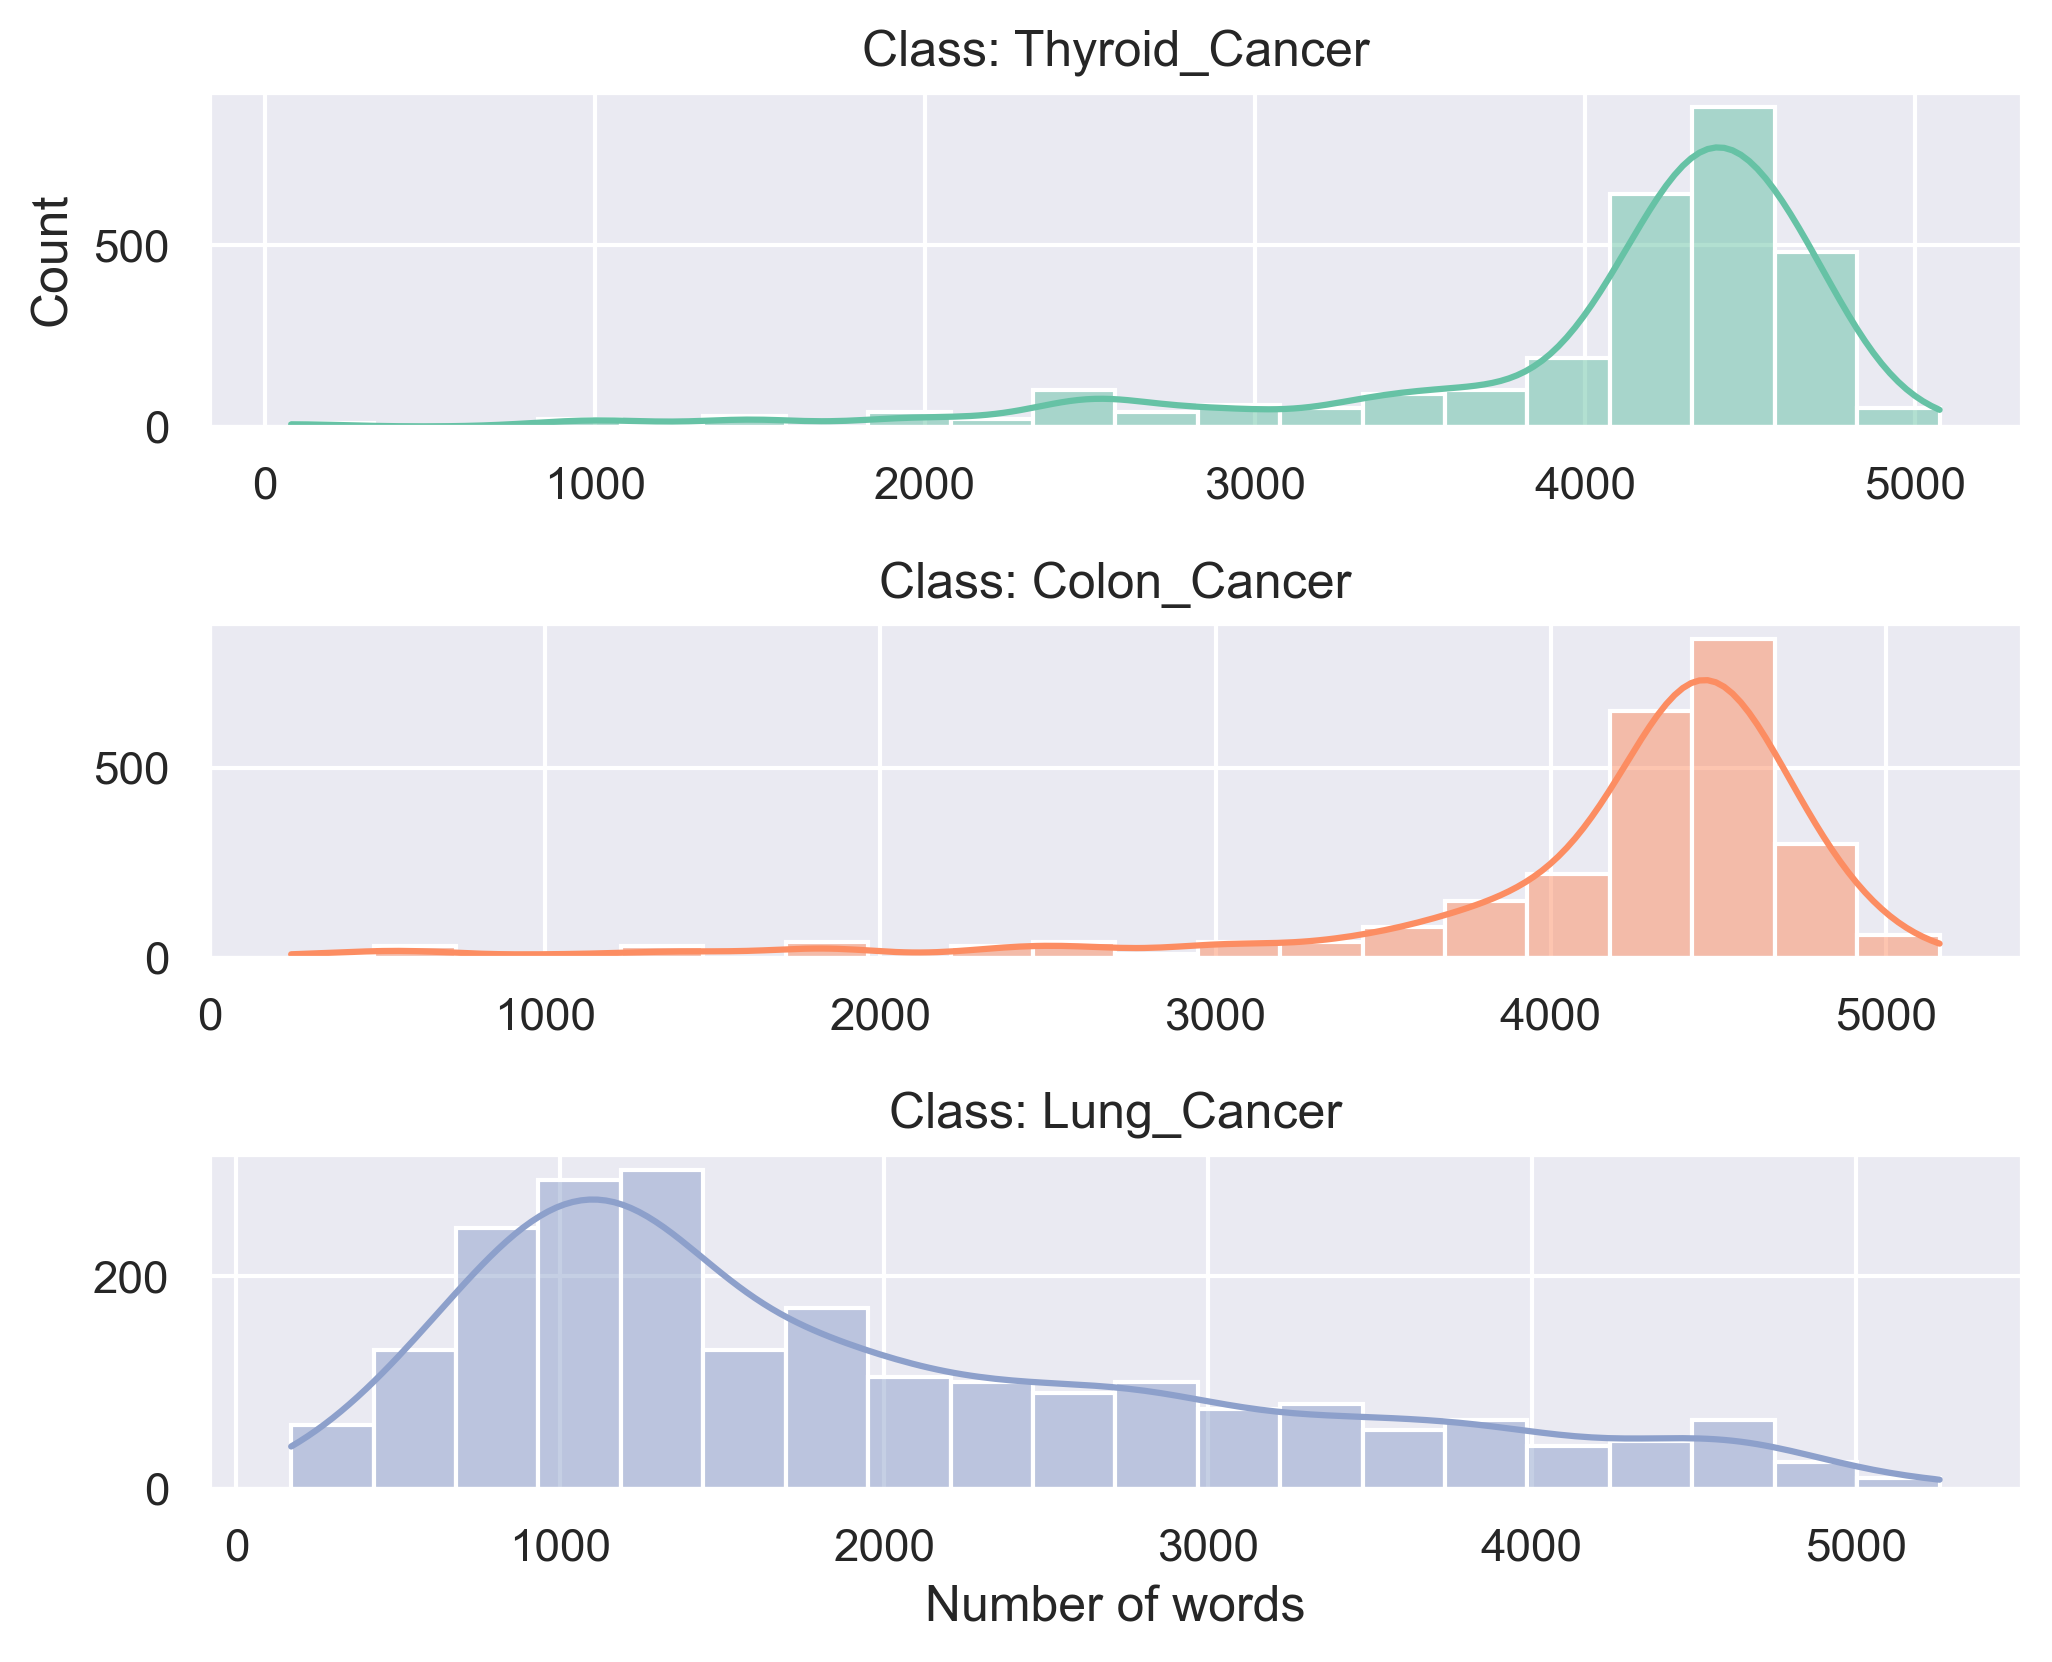

In [7]:
df = df[df['feature'].apply(lambda x: isinstance(x, str))]

# Split the 'feature' text and calculate the average word length
#df['word_length'] = df['feature'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
df['word_length'] = df['feature'].str.split().map(lambda x: len(x))
#df['word_length'] = df['feature'].str.len()

# Create a custom color palette
custom_palette = sns.color_palette("Set2", n_colors=len(df['target'].unique()))

# Create separate histograms for each label with custom colors
fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharey=False, dpi=300)

for i, label in enumerate(df['target'].unique()):
    label_data = df[df['target'] == label]
    sns.histplot(
        x=label_data['word_length'],
        bins=20,
        ax=ax[i],
        color=custom_palette[i],
        kde=True,
    ).set_title(f'Class: {label}')
    
    # Set xlabel for the last subplot
    if i == 2:
        ax[i].set_xlabel("Number of words")
    else:
        ax[i].set_xlabel("")

    # Set ylabel for all subplots except the first one
    if i != 0:
        ax[i].set_ylabel(" ")

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot in high quality
# plt.savefig('word_length_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

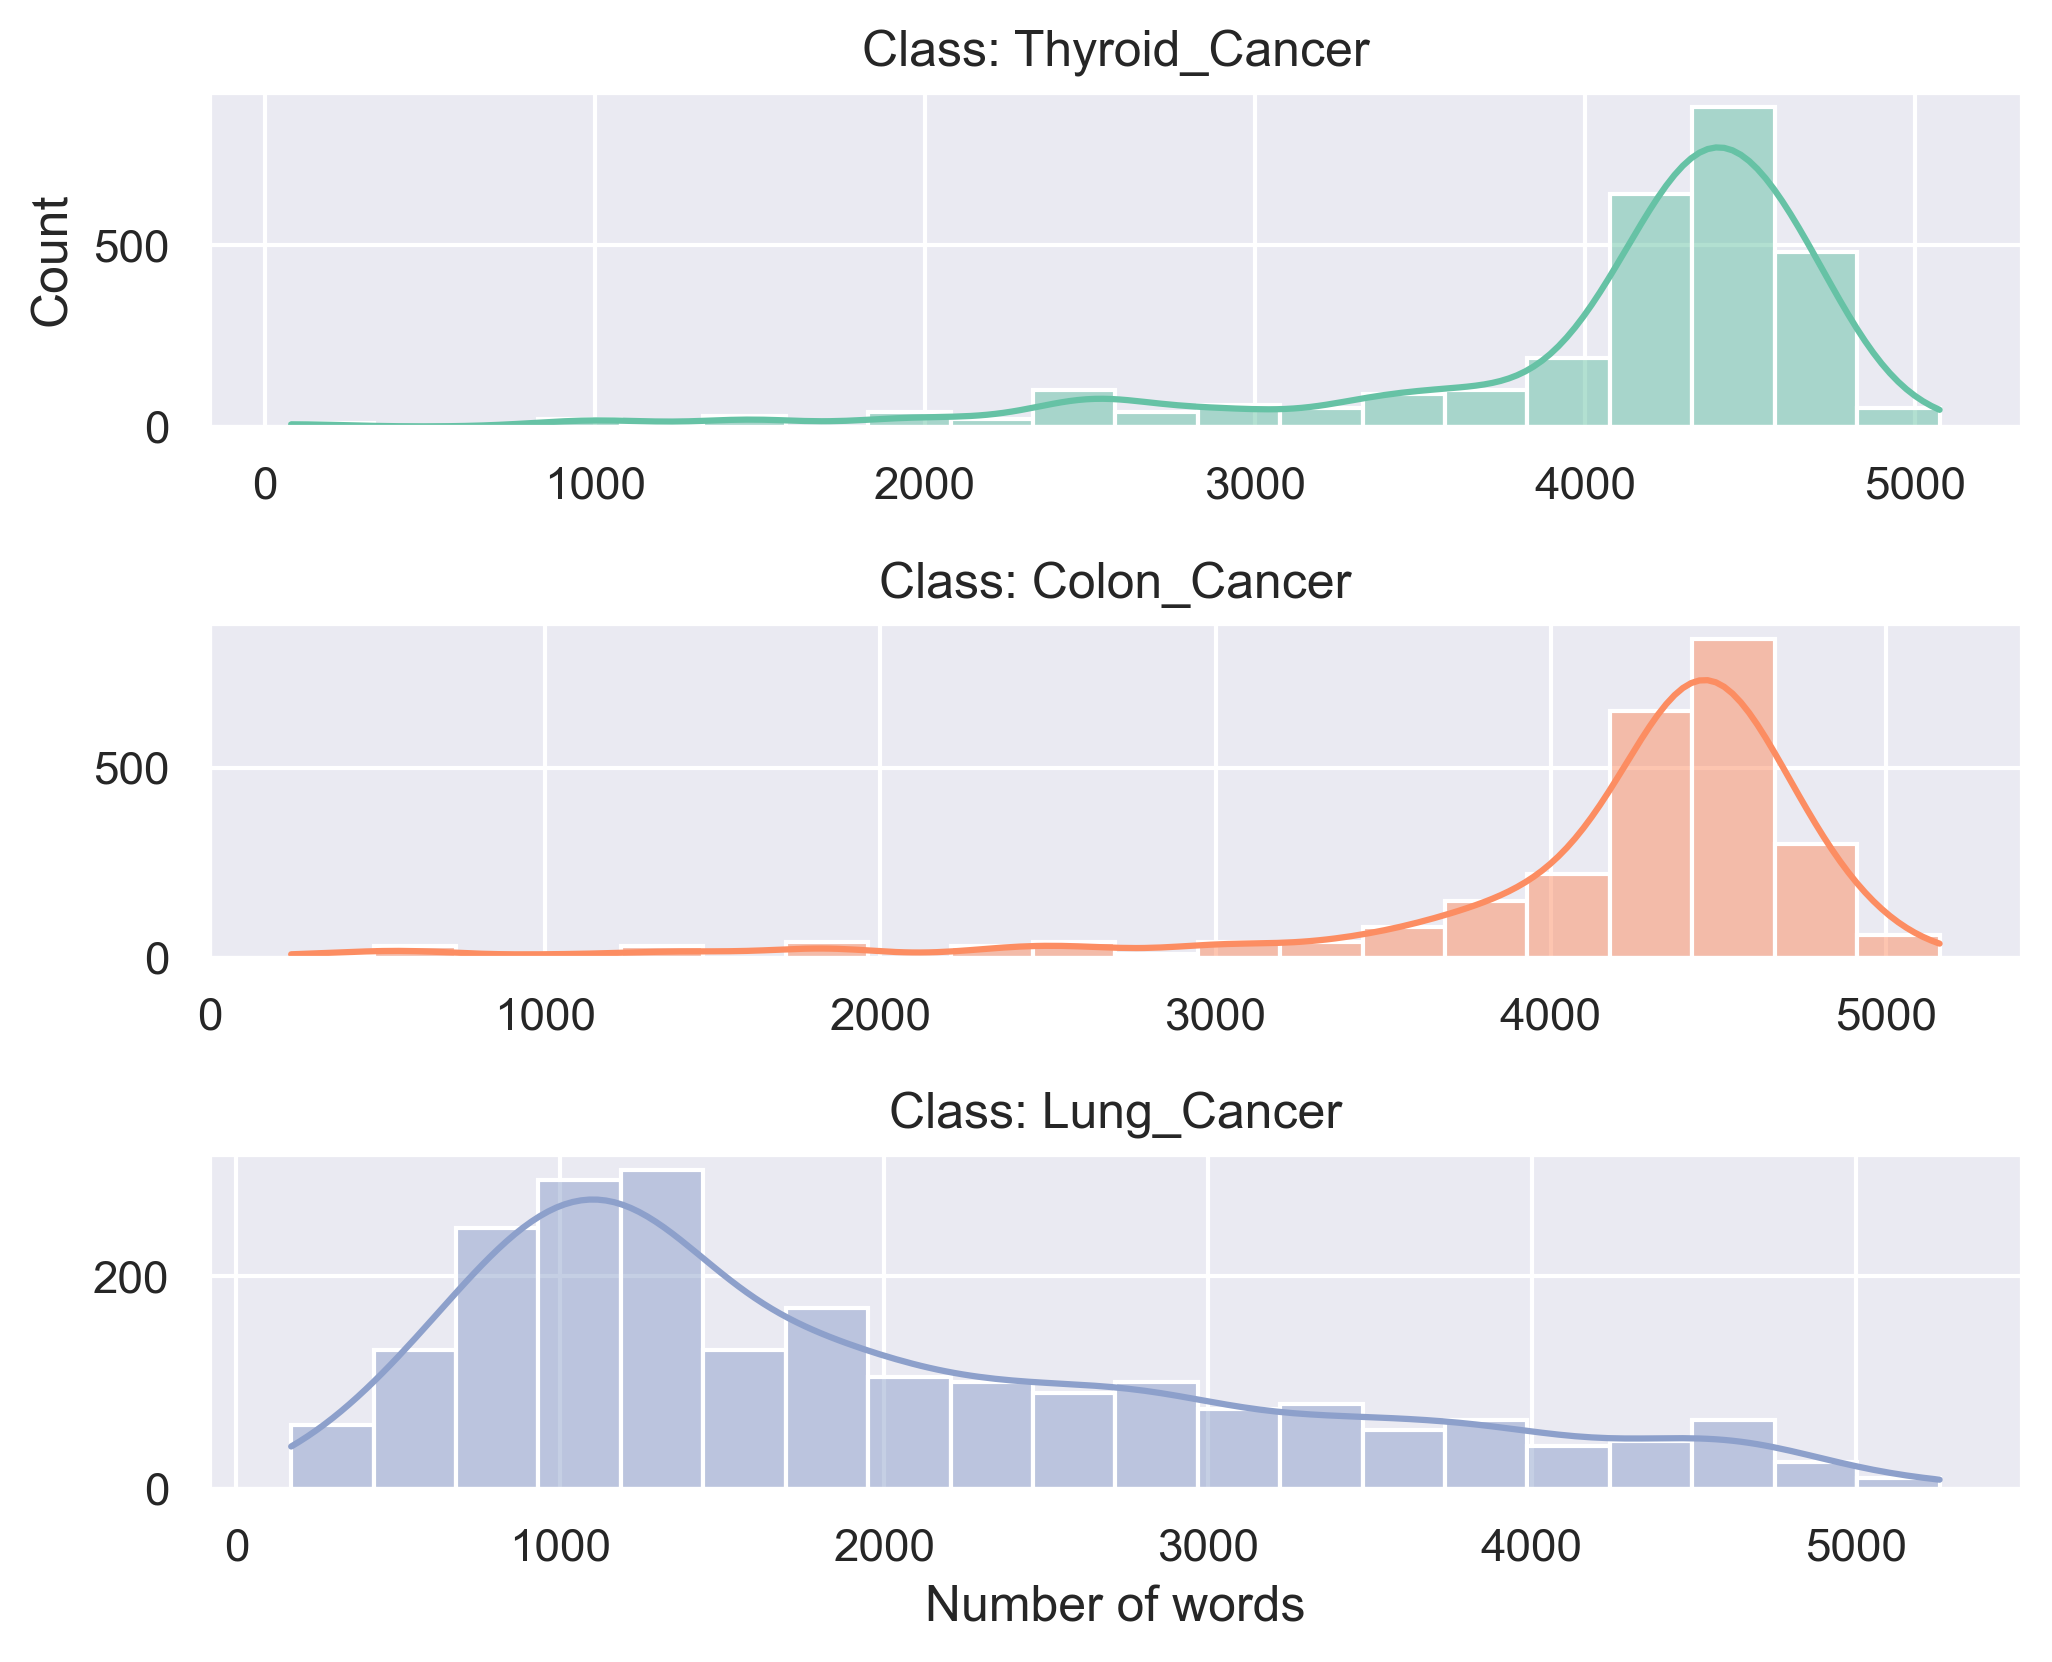

           target   word_count
0    Colon_Cancer  4145.251550
1     Lung_Cancer  1950.321101
2  Thyroid_Cancer  4069.231317


In [8]:
# Calculate the word count for each row and store it in a new column
df['word_count'] = df['feature'].str.split().apply(len)

# Calculate the average word count for each label category
average_word_counts_by_label = df.groupby('target')['word_count'].mean().reset_index()

# Create custom color palette
custom_palette = sns.color_palette("Set2", n_colors=len(df['target'].unique()))

# Create separate histograms for each label with custom colors
fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharey=False, dpi=300)

for i, label in enumerate(df['target'].unique()):
    label_data = df[df['target'] == label]
    sns.histplot(
        x=label_data['word_count'],
        bins=20,
        ax=ax[i],
        color=custom_palette[i],
        kde=True,
    ).set_title(f'Class: {label}')

    # Set xlabel for the last subplot
    if i == 2:
        ax[i].set_xlabel("Number of words")
    else:
        ax[i].set_xlabel("")

    # Set ylabel for all subplots except the first one
    if i != 0:
        ax[i].set_ylabel(" ")

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot in high quality
# plt.savefig('word_length_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

# Display the average word counts by label
print(average_word_counts_by_label)

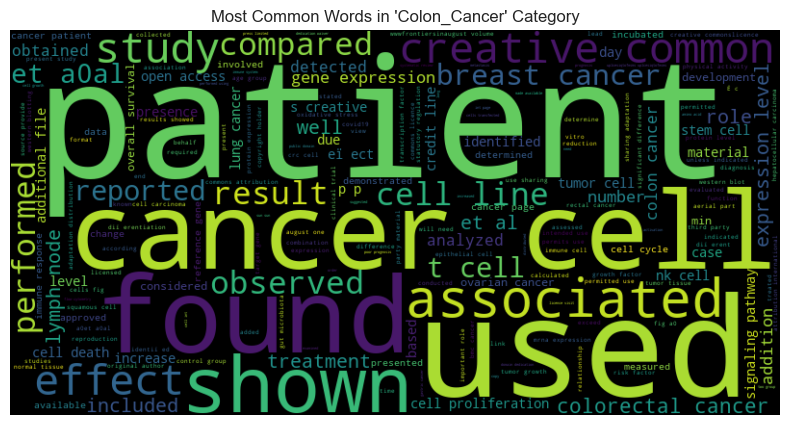

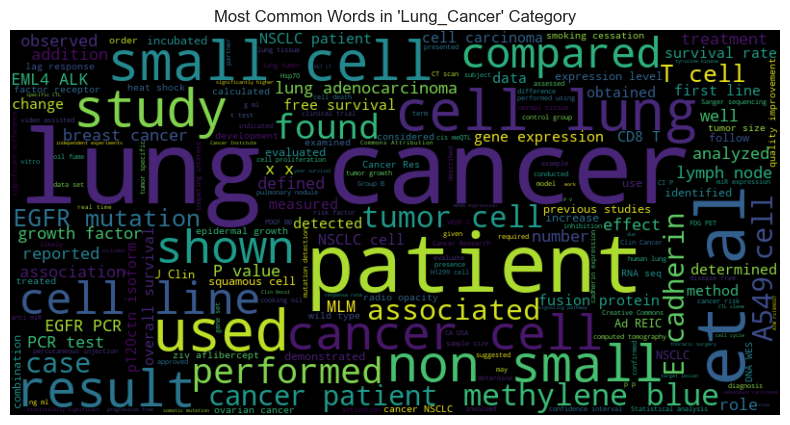

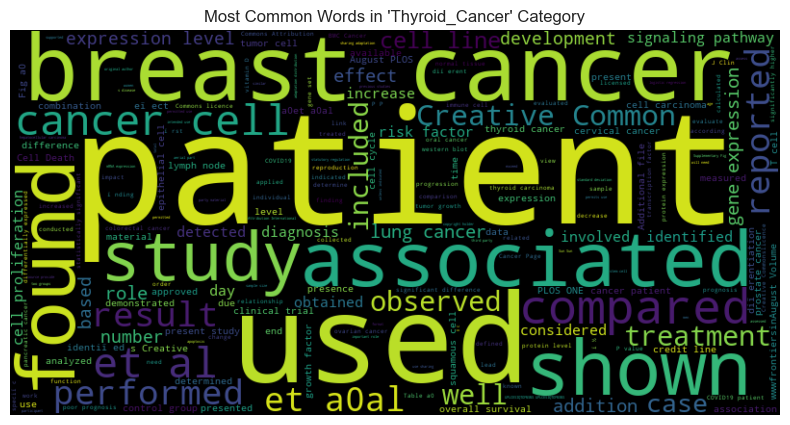

In [6]:
from wordcloud import WordCloud

target_categories = ['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer']
# Create a separate word cloud for each target category
for category in target_categories:
    # Filter the DataFrame by the current target category
    category_df = df[df['target'] == category]
    
    # Combine the text data from the 'feature' column for the current category into a single string
    text = ' '.join(category_df['feature'])
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    # Plot the WordCloud for the current category
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most Common Words in '{category}' Category")
    plt.show()